# Analiza podataka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('handball_stats', index_col='NAME')
df

,CLUB,POSITION,P,G,M,FG,G.1,%,AS,TF,ST,BL,YC,2MIN,RC,BK,HPI
NAME,,,,,,,,,,,,,,,,,
"Mortensen, Casper Ulrich",HSV,LW,28,206,83,137,69,71.28%,9,19,17,0,1,6,0,0,77.0
"Knorr, Juri",RNL,CB,29,178,103,114,64,63.35%,100,80,4,3,1,3,1,0,71.0
"Steinert, Christoph",HCE,RB,30,166,83,81,85,66.67%,42,34,6,5,1,4,0,0,72.0
"Blohme, Lukas",GUM,RW,30,165,69,152,13,70.51%,14,16,11,1,2,8,1,0,74.0
"Smits, Kay",SCM,RB,30,164,65,99,65,71.62%,44,29,4,2,0,5,0,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Niemann, Max",HSV,CB,5,0,0,0,0,0,0,1,0,0,0,0,0,0,64.0
"Teuteberg, Theodor",GWD,RW,4,0,0,0,0,0,0,0,0,0,0,0,0,0,66.0
"Overby, Silas",BER,LB,5,0,0,0,0,0,1,0,0,0,0,0,0,0,68.0


In [3]:
df.shape

(372, 17)

In [4]:
df.columns

Index(['CLUB', 'POSITION', 'P', 'G', 'M', 'FG', 'G.1', '%', 'AS', 'TF', 'ST',
       'BL', 'YC', '2MIN', 'RC', 'BK', 'HPI'],
      dtype='object')

In [5]:
df=df.rename(columns={'G.1':'PEN'})

In [6]:
df=df.drop(['BK','%'], axis=1)

In [7]:
df.dtypes

CLUB         object
POSITION     object
P             int64
G             int64
M             int64
FG            int64
PEN           int64
AS            int64
TF            int64
ST            int64
BL            int64
YC            int64
2MIN          int64
RC            int64
HPI         float64
dtype: object

Pošto atribut BK nema puno informacija, izbacili smo ga zajedno sa atributom %, koji govori o procentualnom šutu, jer imamo podatke o broju golova i broju promašaja pa ukoliko nam bude trebao, možemo lako da ga kreiramo.

In [8]:
df.describe()

,P,G,M,FG,PEN,AS,TF,ST,BL,YC,2MIN,RC,HPI
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,21.744624,42.147849,25.841398,38.137097,4.010753,16.620968,14.075269,3.032258,2.728495,1.107527,4.849462,0.236559,69.139785
std,9.484949,41.388530,26.505842,35.847536,12.896431,24.521488,16.495028,3.906458,5.509995,1.755775,6.019638,0.594636,3.220023
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000
25%,15.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
50%,27.000000,35.000000,17.000000,33.000000,0.000000,5.500000,8.000000,2.000000,0.000000,0.000000,2.000000,0.000000,69.000000
75%,29.000000,70.000000,41.000000,63.000000,0.000000,22.250000,23.000000,4.000000,3.000000,1.250000,7.000000,0.000000,71.250000
max,31.000000,206.000000,121.000000,152.000000,85.000000,151.000000,80.000000,25.000000,44.000000,9.000000,28.000000,4.000000,79.000000


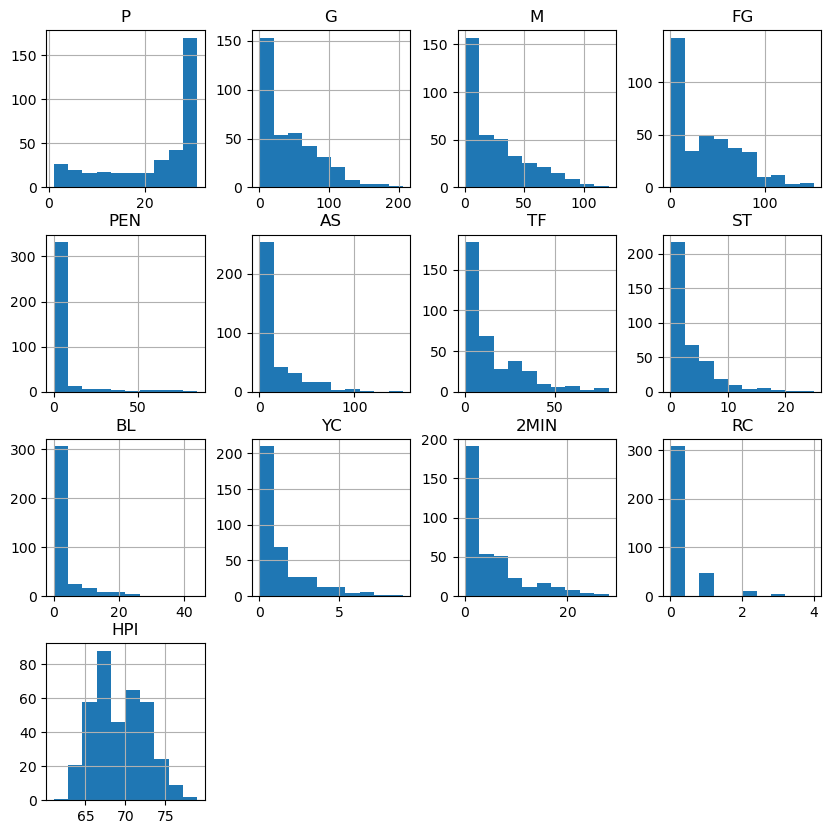

In [9]:
df.hist(bins=10, figsize=(10,10))
plt.show()

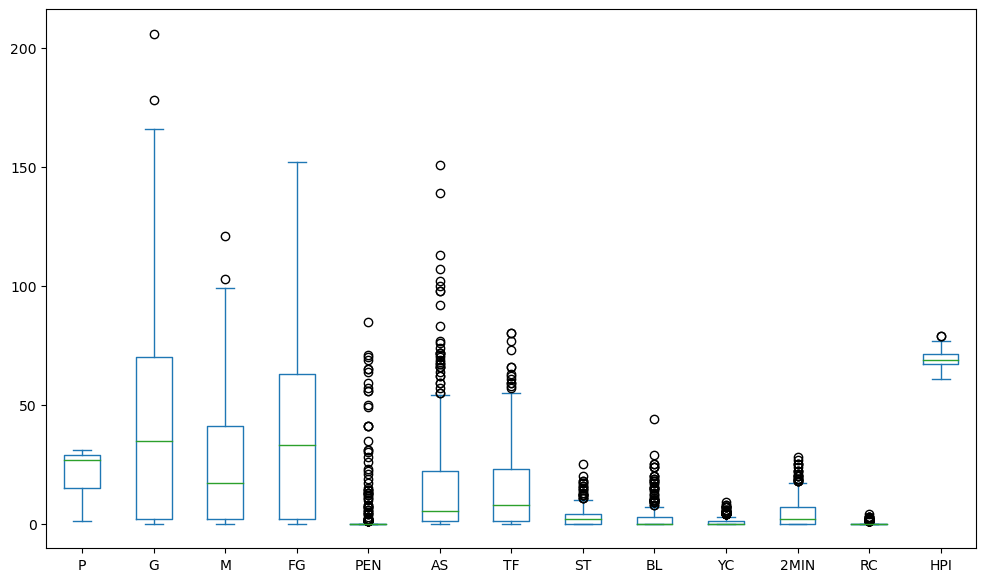

In [10]:
df.plot(kind='box', figsize=(12,7))
plt.show()

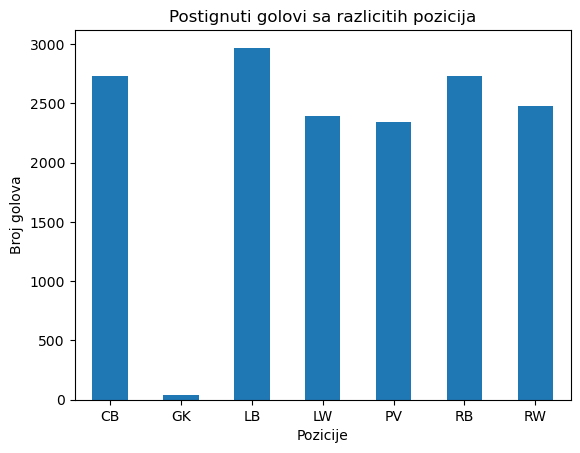

In [11]:
df.groupby('POSITION').sum()['G'].plot(kind='bar')
plt.title('Postignuti golovi sa razlicitih pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj golova')
plt.xticks(rotation=0)
plt.show()

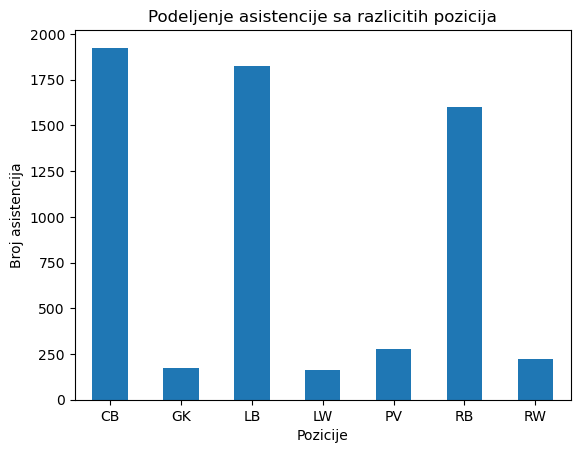

In [12]:
df.groupby('POSITION').sum()['AS'].plot(kind='bar')
plt.title('Podeljenje asistencije sa razlicitih pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj asistencija')
plt.xticks(rotation=0)
plt.show()

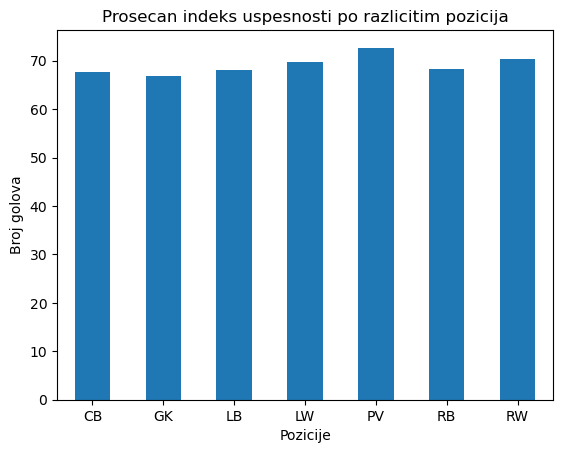

In [13]:
df.groupby('POSITION').mean()['HPI'].plot(kind='bar')
plt.title('Prosecan indeks uspesnosti po razlicitim pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj golova')
plt.xticks(rotation=0)
plt.show()

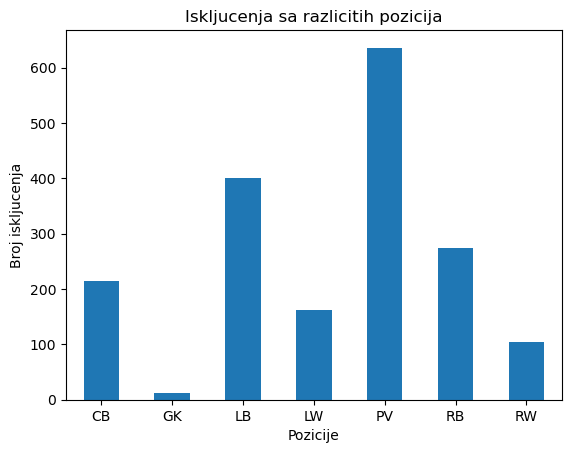

In [14]:
df.groupby('POSITION').sum()['2MIN'].plot(kind='bar')
plt.title('Iskljucenja sa razlicitih pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj iskljucenja')
plt.xticks(rotation=0)
plt.show()

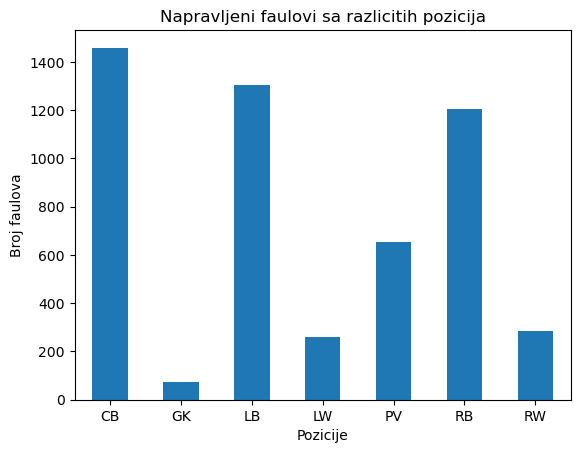

In [15]:
df.groupby('POSITION').sum()['TF'].plot(kind='bar')
plt.title('Napravljeni faulovi sa razlicitih pozicija')
plt.xlabel('Pozicije')
plt.ylabel('Broj faulova')
plt.xticks(rotation=0)
plt.show()

In [16]:
df=df.drop('CLUB', axis=1)

# DBSCAN

In [17]:
df_prep=df.drop(['POSITION', 'YC', 'HPI', 'RC', 'FG'], axis=1)

In [18]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
scaler.fit(df_prep)

MaxAbsScaler()

In [19]:
np_norm=scaler.transform(df_prep)
df_norm=pd.DataFrame(np_norm, columns=df_prep.columns, index=df_prep.index)
df_norm

,P,G,M,PEN,AS,TF,ST,BL,2MIN
NAME,,,,,,,,,
"Mortensen, Casper Ulrich",0.903226,1.000000,0.685950,0.811765,0.059603,0.2375,0.68,0.000000,0.214286
"Knorr, Juri",0.935484,0.864078,0.851240,0.752941,0.662252,1.0000,0.16,0.068182,0.107143
"Steinert, Christoph",0.967742,0.805825,0.685950,1.000000,0.278146,0.4250,0.24,0.113636,0.142857
"Blohme, Lukas",0.967742,0.800971,0.570248,0.152941,0.092715,0.2000,0.44,0.022727,0.285714
"Smits, Kay",0.967742,0.796117,0.537190,0.764706,0.291391,0.3625,0.16,0.045455,0.178571
...,...,...,...,...,...,...,...,...,...
"Niemann, Max",0.161290,0.000000,0.000000,0.000000,0.000000,0.0125,0.00,0.000000,0.000000
"Teuteberg, Theodor",0.129032,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000
"Overby, Silas",0.161290,0.000000,0.000000,0.000000,0.006623,0.0000,0.00,0.000000,0.000000


In [20]:
from scipy.spatial import distance_matrix
dist_matrix=distance_matrix(df_norm.values, df_norm.values)
dist_matrix=pd.DataFrame(dist_matrix, index=df_norm.index, columns=df_norm.index)
dist_matrix.head()

NAME,"Mortensen, Casper Ulrich","Knorr, Juri","Steinert, Christoph","Blohme, Lukas","Smits, Kay","Jakobsen, Emil","Kristjansson, Gisli Thorgeir","Rubin, Lenny","Kristjánsson, Viggó","Lindberg, Hans",...,"Fenske, Fabio Justin","Depping, Luc","Bones, Paul","El-Tayar, Mohamed Essam Moustafa","Pinski, Alexander","Niemann, Max","Teuteberg, Theodor","Overby, Silas","Unbehaun, Levin","Abt, Valentin"
NAME,,,,,,,,,,,,,,,,,,,,,
"Mortensen, Casper Ulrich",0.000000,1.131997,0.609780,0.746279,0.642781,0.743321,1.370193,1.220001,0.919600,0.726862,...,1.842666,1.829586,1.814211,1.638949,1.802286,1.800682,1.815804,1.802079,1.815804,1.844235
"Knorr, Juri",1.131997,0.000000,0.762034,1.233169,0.808695,1.147803,0.865535,1.148760,0.560993,1.281663,...,2.062088,2.052601,2.035678,1.859001,2.029246,2.023116,2.041771,2.027095,2.041771,2.068103
"Steinert, Christoph",0.609780,0.762034,0.000000,0.940532,0.306583,0.641403,1.173775,1.201526,0.616920,0.661987,...,1.809459,1.795477,1.778134,1.565357,1.766114,1.763148,1.781075,1.765083,1.781075,1.812349
"Blohme, Lukas",0.746279,1.233169,0.940532,0.000000,0.729141,0.604916,0.952972,0.820839,0.917065,0.839339,...,1.457891,1.439401,1.418825,1.145506,1.401727,1.399998,1.420531,1.401304,1.420531,1.459551
"Smits, Kay",0.642781,0.808695,0.306583,0.729141,0.000000,0.405279,0.974480,1.092719,0.542412,0.538878,...,1.609326,1.593044,1.574022,1.329413,1.559930,1.557073,1.576849,1.558707,1.576849,1.612090


In [22]:
k_dist=[]
labels=[]
for i in range(len(dist_matrix)):
    k_dist.append(round(dist_matrix.iloc[i,:].nsmallest(16).iloc[-1], 2))
    labels.append(dist_matrix.index[i])

In [23]:
df_k_dist=pd.DataFrame({'Sixteen_dist':k_dist, 'Player': labels})
df_k_dist=df_k_dist.sort_values(by='Sixteen_dist', ascending=False)
df_k_dist=df_k_dist.reset_index()
df_k_dist=df_k_dist.drop('index', axis=1)
df_k_dist

,Sixteen_dist,Player
0,1.00,"Knorr, Juri"
1,0.93,"Köster, Julian"
2,0.92,"Mortensen, Casper Ulrich"
3,0.87,"Steinert, Christoph"
4,0.87,"Michalczik, Marian"
...,...,...
367,0.03,"Kunkel, Gil"
368,0.03,"Weber, Daniel"
369,0.03,"Hanemann, Hendrik"
370,0.03,"Machner, Ole"


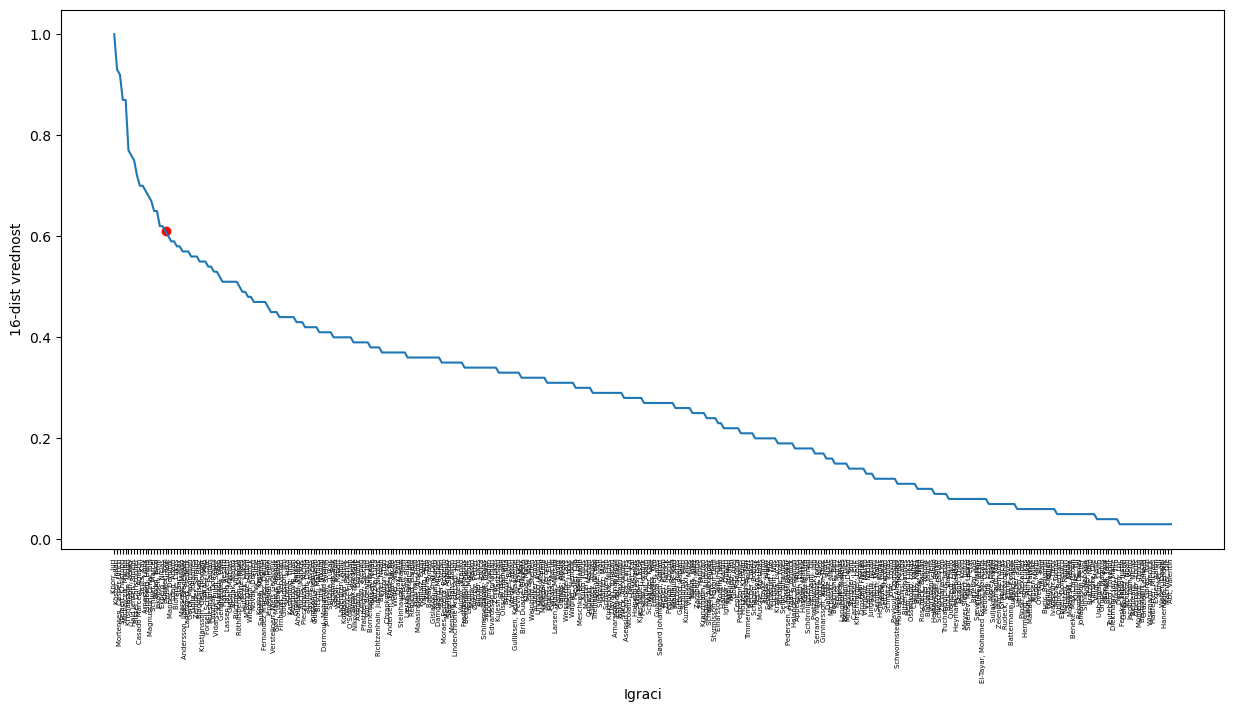

In [24]:
plt.figure(figsize=(15,7))
plt.plot(df_k_dist.Sixteen_dist)
plt.scatter(18, 0.61, color='red')
plt.xlabel('Igraci')
plt.ylabel('16-dist vrednost')
plt.xticks(list(range(372)), df_k_dist.Player, rotation=90, fontsize=5)
plt.show()

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
model=DBSCAN(min_samples=16, eps=0.61)
labels=model.fit_predict(df_norm)

In [27]:
np.unique(labels)

array([-1,  0], dtype=int64)

In [28]:
df_prep['Cluster']=labels
df_prep

,P,G,M,PEN,AS,TF,ST,BL,2MIN,Cluster
NAME,,,,,,,,,,
"Mortensen, Casper Ulrich",28,206,83,69,9,19,17,0,6,-1
"Knorr, Juri",29,178,103,64,100,80,4,3,3,-1
"Steinert, Christoph",30,166,83,85,42,34,6,5,4,-1
"Blohme, Lukas",30,165,69,13,14,16,11,1,8,0
"Smits, Kay",30,164,65,65,44,29,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...
"Niemann, Max",5,0,0,0,0,1,0,0,0,0
"Teuteberg, Theodor",4,0,0,0,0,0,0,0,0,0
"Overby, Silas",5,0,0,0,1,0,0,0,0,0


In [29]:
df_norm

,P,G,M,PEN,AS,TF,ST,BL,2MIN
NAME,,,,,,,,,
"Mortensen, Casper Ulrich",0.903226,1.000000,0.685950,0.811765,0.059603,0.2375,0.68,0.000000,0.214286
"Knorr, Juri",0.935484,0.864078,0.851240,0.752941,0.662252,1.0000,0.16,0.068182,0.107143
"Steinert, Christoph",0.967742,0.805825,0.685950,1.000000,0.278146,0.4250,0.24,0.113636,0.142857
"Blohme, Lukas",0.967742,0.800971,0.570248,0.152941,0.092715,0.2000,0.44,0.022727,0.285714
"Smits, Kay",0.967742,0.796117,0.537190,0.764706,0.291391,0.3625,0.16,0.045455,0.178571
...,...,...,...,...,...,...,...,...,...
"Niemann, Max",0.161290,0.000000,0.000000,0.000000,0.000000,0.0125,0.00,0.000000,0.000000
"Teuteberg, Theodor",0.129032,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000
"Overby, Silas",0.161290,0.000000,0.000000,0.000000,0.006623,0.0000,0.00,0.000000,0.000000


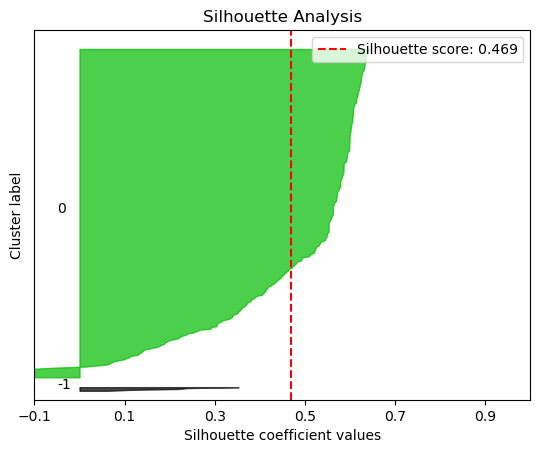

In [30]:
import scikitplot as skplt
skplt.metrics.plot_silhouette(df_norm, labels)
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(df_norm, labels)

0.4693780573077214

In [32]:
silhouette_score(df_prep, labels)

0.5796051056848861

In [33]:
df_prep['Cluster'].value_counts()

 0    367
-1      5
Name: Cluster, dtype: int64

In [34]:
df_prep[df_prep.Cluster==-1]

,P,G,M,PEN,AS,TF,ST,BL,2MIN,Cluster
NAME,,,,,,,,,,
"Mortensen, Casper Ulrich",28,206,83,69,9,19,17,0,6,-1
"Knorr, Juri",29,178,103,64,100,80,4,3,3,-1
"Steinert, Christoph",30,166,83,85,42,34,6,5,4,-1
"Köster, Julian",30,124,97,0,139,80,6,24,15,-1
"Michalczik, Marian",30,56,40,0,151,73,6,10,18,-1


# Fuzzy C-means

In [45]:
df_prep=df_prep.drop('Cluster', axis=1)

In [47]:
df_prep=df_prep.drop('PEN', axis=1)

In [48]:
scaler.fit(df_prep)
np_norm=scaler.transform(df_prep)

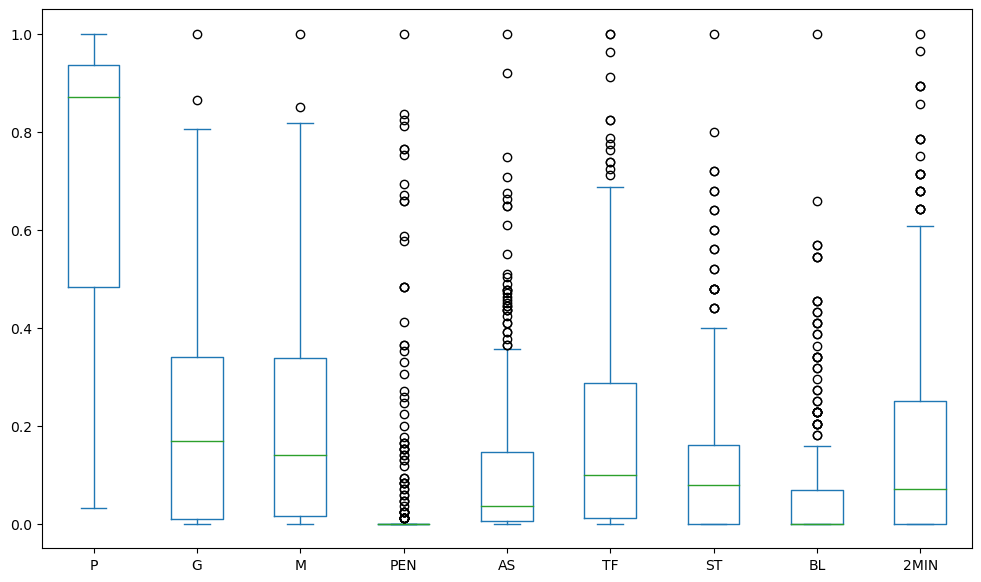

In [35]:
df_norm.plot(kind='box', figsize=(12,7))
plt.show()

In [36]:
from fcmeans import FCM

In [68]:
for i in range(2, 10):
    model=FCM(n_clusters=i)
    model.fit(np_norm)
    labels=model.predict(np_norm)
    print(f'Broj klastera: {i}')
    print(f'Siluet indeks: {round(silhouette_score(df_norm, labels), 3)}')
    print(f'Koeificijent particije: {round(model.partition_coefficient, 3)}')
    print(f'Koeficijent entropije particije: {round(model.partition_entropy_coefficient, 3)}')
    print('-----------------------------------------')

Broj klastera: 2
Siluet indeks: 0.327
Koeificijent particije: 0.337
Koeficijent entropije particije: 0.359
-----------------------------------------
Broj klastera: 3
Siluet indeks: 0.341
Koeificijent particije: 0.202
Koeficijent entropije particije: 0.333
-----------------------------------------
Broj klastera: 4
Siluet indeks: 0.326
Koeificijent particije: 0.133
Koeficijent entropije particije: 0.318
-----------------------------------------
Broj klastera: 5
Siluet indeks: 0.323
Koeificijent particije: 0.096
Koeficijent entropije particije: 0.302
-----------------------------------------
Broj klastera: 6
Siluet indeks: 0.297
Koeificijent particije: 0.074
Koeficijent entropije particije: 0.282
-----------------------------------------
Broj klastera: 7
Siluet indeks: 0.313
Koeificijent particije: 0.06
Koeficijent entropije particije: 0.264
-----------------------------------------
Broj klastera: 8
Siluet indeks: 0.292
Koeificijent particije: 0.051
Koeficijent entropije particije: 0.243
